## Magic function for graphs (matplotlib library)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## NumPy

NumPy is an extension of python supporting huge multi-dimensional arrays and matrices and containing high-level mathematical functions to process such data.

In [2]:
import numpy

### create numpy array

In [3]:
x = numpy.array(range(10))
print x, type(x), x.dtype, x.shape

[0 1 2 3 4 5 6 7 8 9] <type 'numpy.ndarray'> int64 (10,)


In [4]:
y = numpy.array( [(1.5, 2, 3), (4, 5, 6) ])
print y, type(y), y.dtype, y.shape

[[ 1.5  2.   3. ]
 [ 4.   5.   6. ]] <type 'numpy.ndarray'> float64 (2, 3)


In [5]:
# necessary indices from array
print x[3:5]
# array elements with step=3
print x[::3]
# array elements with some boolean condition
print x[x%4 ==0]

[3 4]
[0 3 6 9]
[0 4 8]


### linspace &mdash; create 1d mesh 

In [6]:
points = numpy.linspace(0, 1, num=100)
print points

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182  0.

### simple functions

In [7]:
points.max(), points.min(), points.mean(), points.var(), points.sum()

(1.0, 0.0, 0.5, 0.085016835016835032, 50.0)

### generate random values and plot histograms

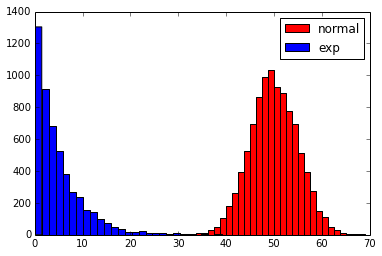

In [8]:
random_normal = numpy.random.normal(size=10000, loc=50, scale=5)
random_exp = numpy.random.exponential(size=5000, scale=5)
hist(random_normal, bins=30, color='red', label='normal')
hist(random_exp, bins=30, color='blue', label='exp')
legend()

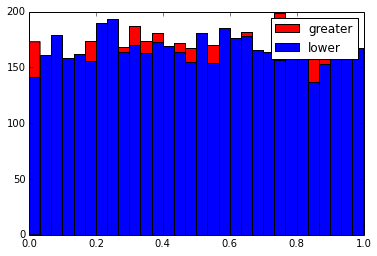

In [9]:
random_floats = numpy.random.random(size=10000)
random_classes = numpy.random.random(size=10000) > 0.5
hist(random_floats[random_classes == True], bins=30, color='red', label='greater')
hist(random_floats[random_classes == False], bins=30, color='blue', label='lower')
legend()

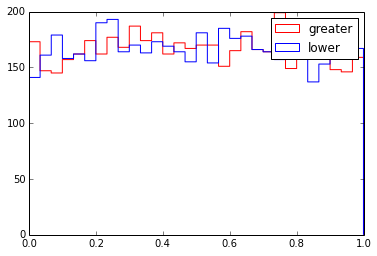

In [10]:
hist(random_floats[random_classes == True], bins=30, color='red', label='greater', histtype='step')
hist(random_floats[random_classes == False], bins=30, color='blue', label='lower', histtype='step')
legend()

### sort elements

In [11]:
# return new sorted array
numpy.sort(random_floats)

array([  1.72333915e-04,   4.08665210e-04,   4.57377894e-04, ...,
         9.99493672e-01,   9.99815885e-01,   9.99875028e-01])

### argsort 
Returns the indices that would sort an array

In [12]:
random_floats.argsort()

array([9869, 1620, 2887, ..., 6798, 5169, 3511])

In [13]:
# update array on sort version
random_floats.sort()
random_floats.argsort()

array([   0,    1,    2, ..., 9997, 9998, 9999])

### cumulative sum

In [14]:
random_floats[random_classes == True].cumsum(axis=0)

array([  4.08665210e-04,   8.66043104e-04,   2.14269461e-03, ...,
         2.49070594e+03,   2.49170538e+03,   2.49270520e+03])

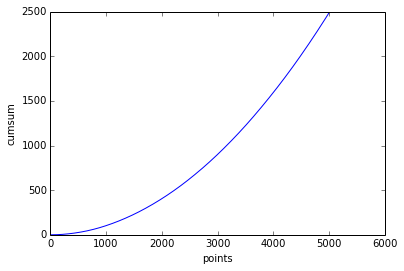

In [15]:
plot(range(numpy.sum(random_classes == True)), random_floats[random_classes == True].cumsum(axis=0))
xlabel('points')
ylabel('cumsum')

### searchsorted
Find indices where elements should be inserted to maintain order

In [16]:
bins = numpy.linspace(0.1, 0.9, 6)
print bins
bins_index = numpy.searchsorted(bins, random_floats)
print random_floats
print bins_index

[ 0.1   0.26  0.42  0.58  0.74  0.9 ]
[  1.72333915e-04   4.08665210e-04   4.57377894e-04 ...,   9.99493672e-01
   9.99815885e-01   9.99875028e-01]
[0 0 0 ..., 6 6 6]


Note: here are the first bin with values < 0. and the latest bins is [0.875, 1]

### bincount 
Count number of occurrences of each value in array of non-negative ints

In [17]:
# count events with label 1 in each bin 
print numpy.bincount(bins_index, weights=random_classes)
# count events with label 0 in each bin
print numpy.bincount(bins_index, weights=1 - random_classes)

[ 500.  776.  843.  807.  795.  798.  485.]
[ 443.  841.  813.  802.  824.  782.  491.]


### percentile

Compute the qth percentile of the data

In [18]:
q50 = numpy.percentile(random_floats, 10)
print 'value', q50
print 'check percentile', 1. * numpy.sum(random_floats < q50) / len(random_floats)

value 0.105608289596
check percentile 0.1


## Exercise

### Generate numpy.array with shape (10, 10), calculate min, max, mean, var for each axis

Hint: use `numpy.reshape` and `axis` parameter in `min` (etc.) function 

In [19]:
matrix = numpy.random.normal(size=100).reshape((10, 10))
print matrix

[[ 1.43824657  0.09207331 -0.06213516  1.24321865 -0.3955061   1.96016055
  -0.33808091 -1.64390834  0.06531956 -1.43042341]
 [-1.10082704  0.54636134  1.01099451  0.29041271  0.50128341  0.83409641
  -0.23575284  1.01302567  0.55150632 -1.23921034]
 [-1.30242837 -1.00982671 -1.37283862 -0.55131034 -1.00055077  1.12341434
  -0.68489075 -1.33458098 -1.15875112  0.28555243]
 [ 0.78804538  1.1551358   0.35099338  0.40999097 -0.25451546  1.28805766
   0.27714877  1.02358663  0.84225029 -0.85955075]
 [-1.46503352  1.9579244   1.13054473 -1.35606085 -0.36307763 -0.22114038
   0.00476517 -0.64345415  0.32769844  0.2254105 ]
 [-2.36876956  1.99176544 -1.54369138  2.64298577 -0.81502878  0.07341303
  -2.08277986  0.39084085  0.23646795 -0.99529805]
 [ 1.67370366 -0.2829176  -1.22624684  0.68668279  0.58472438 -0.39911747
   1.74845414 -0.76148402 -1.49353768 -0.37687396]
 [-0.34184803 -0.34529561 -1.05522072  0.96477128 -0.27560028 -0.80598429
   0.11223972 -0.63151057 -0.59483171 -0.44952094]


In [20]:
for axis_i in [0, 1]:
    print "Axis", axis_i
    print matrix.max(axis=axis_i)
    print matrix.min(axis=axis_i)
    print matrix.mean(axis=axis_i)
    print matrix.var(axis=axis_i)

Axis 0
[ 1.67370366  1.99176544  1.13054473  2.64298577  0.77807879  1.96016055
  1.74845414  1.02358663  0.84225029  0.68129233]
[-2.36876956 -1.00982671 -1.54369138 -1.35606085 -1.00055077 -0.80598429
 -2.08277986 -1.64390834 -1.49353768 -1.43042341]
[-0.31420599  0.30916988 -0.14894089  0.42119267 -0.13554574  0.33908241
 -0.17014527 -0.22332604 -0.28060397 -0.45317792]
[ 1.54219966  1.03189107  1.00892873  1.0912866   0.31225116  0.74104023
  0.84783897  0.89227803  0.62026014  0.43373554]
Axis 1
[ 1.96016055  1.01302567  1.12341434  1.28805766  1.9579244   2.64298577
  1.74845414  0.96477128  0.68129233  0.96952724]
[-1.64390834 -1.23921034 -1.37283862 -0.85955075 -1.46503352 -2.36876956
 -1.49353768 -1.05522072 -0.73060457 -1.35236107]
[ 0.09289647  0.21718902 -0.70062109  0.50211427 -0.04024233 -0.24700946
  0.01533874 -0.34228012 -0.01415599 -0.13973037]
[ 1.24059521  0.60136734  0.59335872  0.40220805  0.98336097  2.45433441
  1.1365024   0.28016702  0.17633488  0.54512297]


### Generate predictions for class 1 from normal + uniform pdf and predictions for class 0 exponential + uniform, size for both classes is 10000

Hint: use `numpy.concatenate` function 

In [21]:
probs_signal = numpy.random.normal(size=10000) + numpy.random.random(size=10000)
probs_signal = probs_signal - probs_signal.min()
probs_signal = probs_signal / (probs_signal.max() - probs_signal.min())
probs_bck = numpy.random.exponential(size=10000) + numpy.random.random(size=10000)
probs_bck = probs_bck / (probs_bck.max() - probs_bck.min())
probs = numpy.concatenate([probs_signal, probs_bck]) 
class_labels = [1] * 10000 + [0] * 10000
class_labels = numpy.array(class_labels)

### Plot histograms of predictions for each class, bins=100

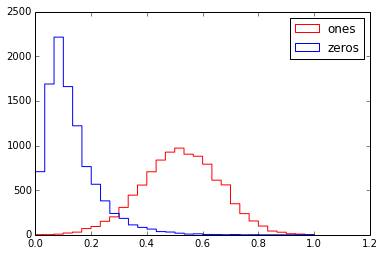

In [22]:
hist(probs[class_labels == 1], bins=30, color='red', label='ones', histtype='step')
hist(probs[class_labels == 0], bins=30, color='blue', label='zeros', histtype='step')
legend()
pass

### Compute for meshgrid [0, 20-p, 40-p, 60-p, 80-p, 1] (where X-p - X percentile for 1-labeled data) the following metrics:
* efficiencies for each class
* s / sqrt(b + 10), where s - count of 1-labeled data, b - 0-labeled data

In [23]:
bins = numpy.percentile(probs[class_labels == 1], [20, 40, 60, 80])

In [24]:
bins

array([ 0.40611679,  0.48718048,  0.55860725,  0.63763161])

In [25]:
bins_index = numpy.searchsorted(bins, probs)

In [27]:
bins_index[:100]

array([0, 3, 4, 2, 1, 2, 2, 1, 4, 3, 0, 0, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 2,
       1, 4, 4, 1, 1, 2, 1, 4, 1, 1, 2, 0, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 2,
       3, 0, 3, 2, 3, 0, 2, 2, 0, 1, 4, 1, 3, 4, 4, 2, 2, 2, 4, 3, 4, 3, 3,
       0, 0, 0, 3, 2, 2, 1, 0, 1, 3, 4, 2, 4, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0,
       2, 1, 4, 2, 1, 0, 4, 2])

In [28]:
signal_count = numpy.bincount(bins_index, weights=class_labels)

In [29]:
signal_count

array([ 2000.,  2000.,  2000.,  2000.,  2000.])

In [ ]:
bck_count = numpy.bincount(bins_index, weights=1 - class_labels)

In [23]:


signal_count = numpy.bincount(bins_index, weights=class_labels)
bck_count = numpy.bincount(bins_index, weights=1 - class_labels)
print '1-label eff', '\n', 1. * signal_count / numpy.sum(class_labels)
print '0-lable eff', '\n', 1. * bck_count / numpy.sum(1-class_labels)
print 's/sqrt(s+b)', '\n', 1. * signal_count / numpy.sqrt(10. + bck_count)

1-label eff 
[ 0.2  0.2  0.2  0.2  0.2]
0-lable eff 
[ 0.7135  0.0941  0.0577  0.0522  0.0825]
s/sqrt(s+b) 
[ 23.66077028  64.85444351  82.54883434  86.71099695  69.21285402]


### Plot dependence between metric and bin

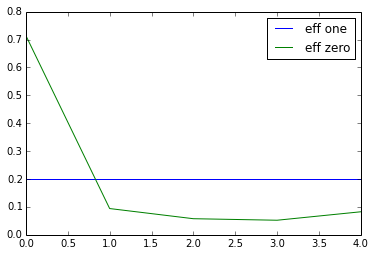

In [24]:
plot(range(len(signal_count)), 1. * signal_count / numpy.sum(class_labels), label='eff one')
plot(range(len(signal_count)), 1. * bck_count / numpy.sum(1-class_labels), label='eff zero')
legend()

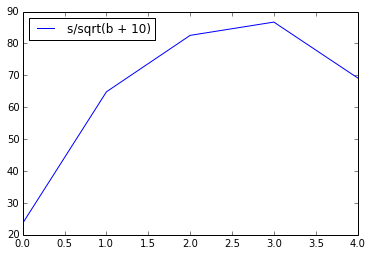

In [25]:
plot(range(len(signal_count)), 1. * signal_count / numpy.sqrt(10. + bck_count), label='s/sqrt(b + 10)')
legend(loc='best')

## `.csv` and `.root` data formats

In [26]:
import pandas

In [27]:
dict_data = {'id': range(100), 'random': numpy.random.normal(size=100), 'sin': numpy.sin(numpy.random.random(100))}
df = pandas.DataFrame(dict_data)
df.head()

,id,random,sin
0,0,2.336432,0.822781
1,1,-0.810542,0.814898
2,2,-0.133115,0.569655
3,3,0.298496,0.262812
4,4,-1.314676,0.329966


### Comma-separated values (CSV) 

This data format is a widely spread among data scientists. CSV is a common format that’s used to divide data into fields that are separated by delimiters (in this case by comma, but tab delimiter '\t' is also spread). Data are represented as table: rows are objects (events in HEP), columns are fields or features (branches in HEP). 

#### save data into `.csv`

In [28]:
df.to_csv('example.csv', sep=',', index=False)

#### read `.csv` file into `pandas.DataFrame`

In [29]:
pandas.read_csv('example.csv', sep=',').head()

,id,random,sin
0,0,2.336432,0.822781
1,1,-0.810542,0.814898
2,2,-0.133115,0.569655
3,3,0.298496,0.262812
4,4,-1.314676,0.329966


### ROOT format

ROOT provides a file format that is a machine-independent compressed binary format, including both the data and its description, and provides an open-source automated tool to generate the data description (or "dictionary") when saving data, and to generate C++ classes corresponding to this description when reading back the data.  The dictionary is used to build and load the C++ code to load the binary objects saved in the ROOT file and to store them into instances of the automatically generated C++ classes.

Details https://root.cern.ch/drupal/content/root-files-1

### `root_numpy` - interface between ROOT and NumPy
http://rootpy.github.io/root_numpy

In [30]:
import root_numpy

#### create `.root` from `pandas.DataFrame`

In [31]:
root_numpy.array2root(df.to_records(), 'example.root', treename='data', mode='recreate')

#### read from `.root` to `numpy.array`

In [32]:
root_data = root_numpy.root2array('example.root', treename='data', branches=['random', 'sin'], 
                                  selection='random > 0.')

In [33]:
root_data

array([(2.336431639809109, 0.8227811915510843),
       (0.2984961021830935, 0.2628122700006566),
       (1.1208235276459444, 0.20565587397233215),
       (0.10761946876759353, 0.28953888311298587),
       (1.8151800992344758, 0.152323250585665),
       (0.2697358666293772, 0.7314959866670023),
       (0.43351111206759985, 0.7251350333823199),
       (0.057673446979568097, 0.7712911474504108),
       (0.8454683813675241, 0.7426665450133729),
       (0.18838949702481697, 0.05920266119720316),
       (1.3300303243975264, 0.4092026541755449),
       (1.3139128293428362, 0.07126419692356664),
       (0.40741159480906075, 0.3783899434148617),
       (0.4739226849351842, 0.2726341350887104),
       (0.3435099539628237, 0.7002928455419898),
       (0.8051151018177821, 0.25735284782971385),
       (0.3206301056411218, 0.14969329474253837),
       (0.986491328524166, 0.40041942511169293),
       (0.7101478297032612, 0.2806898417430902),
       (0.35101532728992096, 0.3761098770172829),
       (1

In [34]:
# Note that here numpy.array has named dtype
root_data.dtype

dtype([('random', '<f8'), ('sin', '<f8')])

50


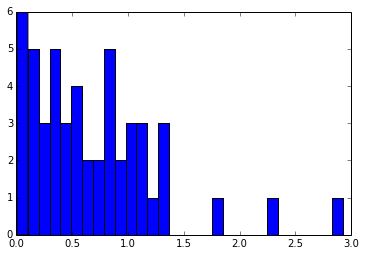

In [35]:
print len(root_data)
hist(root_data['random'], bins=30)
pass

#### convert to `pandas.DataFrame`

In [36]:
pandas.DataFrame(root_data).head()

,random,sin
0,2.336432,0.822781
1,0.298496,0.262812
2,1.120824,0.205656
3,0.107619,0.289539
4,1.815180,0.152323


## Exercise


### Read `example.root` with `id > 10 and (random + sin > 1.4 or random * sin > 0.5)`

In [37]:
root_data = root_numpy.root2array('example.root', treename='data', branches=['random', 'sin'],
                                  selection='(id > 10) && ((random + sin > 1.5) || (random * sin < 0.2))')

### Plot scatter  `random + sin` vs `random * sin` 

Hint: use scatter function from matplotlib

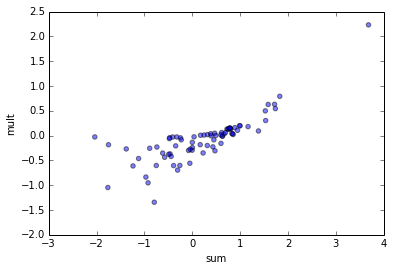

In [38]:
scatter(root_data['random'] + root_data['sin'], root_data['random'] * root_data['sin'], alpha=0.5)
xlabel('sum')
ylabel('mult')